In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as font_manager
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib import rcParams
from scipy.interpolate import griddata

sns.set_theme(style="white")
font_path = (
    "/home/femtomc/.local/share/fonts/Unknown Vendor/TrueType/Lato/Lato_Bold.ttf"
)
font_manager.fontManager.addfont(font_path)
custom_font_name = font_manager.FontProperties(fname=font_path).get_name()
rcParams["font.family"] = custom_font_name
rcParams["figure.autolayout"] = True
label_fontsize = 70  # Set the desired font size here

In [2]:
enum_air = pd.read_csv("./training_runs/grasp_air_enum_epochs_201_mccoy_prior.csv")

In [3]:
enum_air

,ELBO Loss,Accuracy,Epoch wall clock times
0,405.037872,0.252450,5.881007
1,459.223969,0.286467,12.083103
2,459.734528,0.305850,18.214970
3,459.890717,0.317117,24.256171
4,459.970184,0.325883,30.486101
...,...,...,...
196,643.632751,0.983350,1226.297435
197,643.720703,0.983217,1232.225822
198,643.686462,0.983133,1238.345873
199,643.783875,0.983267,1244.454653


In [4]:
reinforce_air = pd.read_csv(
    "./training_runs/grasp_air_reinforce_epochs_201_mccoy_prior.csv"
)

In [5]:
reinforce_air

,ELBO Loss,Accuracy,Epoch wall clock times
0,-79.763191,0.242250,1.349225
1,399.064697,0.239517,2.740479
2,419.759369,0.243150,4.145268
3,438.160004,0.254617,5.575825
4,451.207703,0.260933,7.046089
...,...,...,...
196,623.378296,0.905450,276.599404
197,621.610107,0.889233,277.987017
198,623.727051,0.899800,279.364952
199,622.702881,0.913400,280.752481


In [6]:
reinforce_iwae_air = pd.read_csv(
    "./training_runs/grasp_air_iwae_2_reinforce_epochs_201_mccoy_prior.csv"
)

In [7]:
reinforce_iwae_air

,ELBO Loss,Accuracy,Epoch wall clock times
0,249.034882,0.252133,2.114826
1,427.246185,0.272600,4.275751
2,447.391602,0.295717,6.447088
3,461.928558,0.358217,8.613023
4,477.328430,0.434333,10.775166
...,...,...,...
196,632.013550,0.936667,429.629868
197,631.790710,0.946567,431.802284
198,632.315369,0.939200,433.980515
199,632.336304,0.925917,436.145088


In [8]:
mvd_air = pd.read_csv("./training_runs/grasp_air_mvd_epochs_201_mccoy_prior.csv")
mvd_air

,ELBO Loss,Accuracy,Epoch wall clock times
0,401.881836,0.260333,1.692627
1,459.095612,0.292667,3.421934
2,459.744812,0.306750,5.123230
3,459.902924,0.316883,6.870048
4,459.972382,0.323050,8.562668
...,...,...,...
196,639.854309,0.983000,343.208359
197,639.816956,0.983050,344.927580
198,639.905029,0.982933,346.654120
199,639.962158,0.982817,348.363807


In [9]:
mvd_iwae_air = pd.read_csv(
    "./training_runs/grasp_air_iwae_2_mvd_epochs_201_mccoy_prior.csv"
)
mvd_iwae_air

,ELBO Loss,Accuracy,Epoch wall clock times
0,463.904694,0.792633,3.491250
1,578.965027,0.936333,7.124057
2,605.606506,0.961217,10.616296
3,616.349854,0.966000,14.275062
4,622.419739,0.972267,17.833371
...,...,...,...
196,645.829590,0.983617,685.796737
197,645.838135,0.983583,689.186650
198,645.878662,0.983433,692.577240
199,645.817200,0.983733,695.964245


In [10]:
pyro_reinforce_air = pd.read_csv(
    "./training_runs/pyro_trace_graph_elbo_bsize64_mccoy_prior.csv",
)
pyro_reinforce_air

,ELBO Loss,Accuracy,Epoch wall clock times
0,-469.427551,0.220017,35.554085
1,-509.881696,0.226217,71.220093
2,-533.529103,0.213067,106.522916
3,-549.319979,0.278800,141.989349
4,-556.879894,0.492267,178.040156
5,-565.871584,0.551017,213.334577
6,-572.352145,0.607383,248.606132
7,-576.370602,0.397033,284.077162
8,-580.960738,0.662133,320.836548
9,-585.502480,0.740900,357.357442


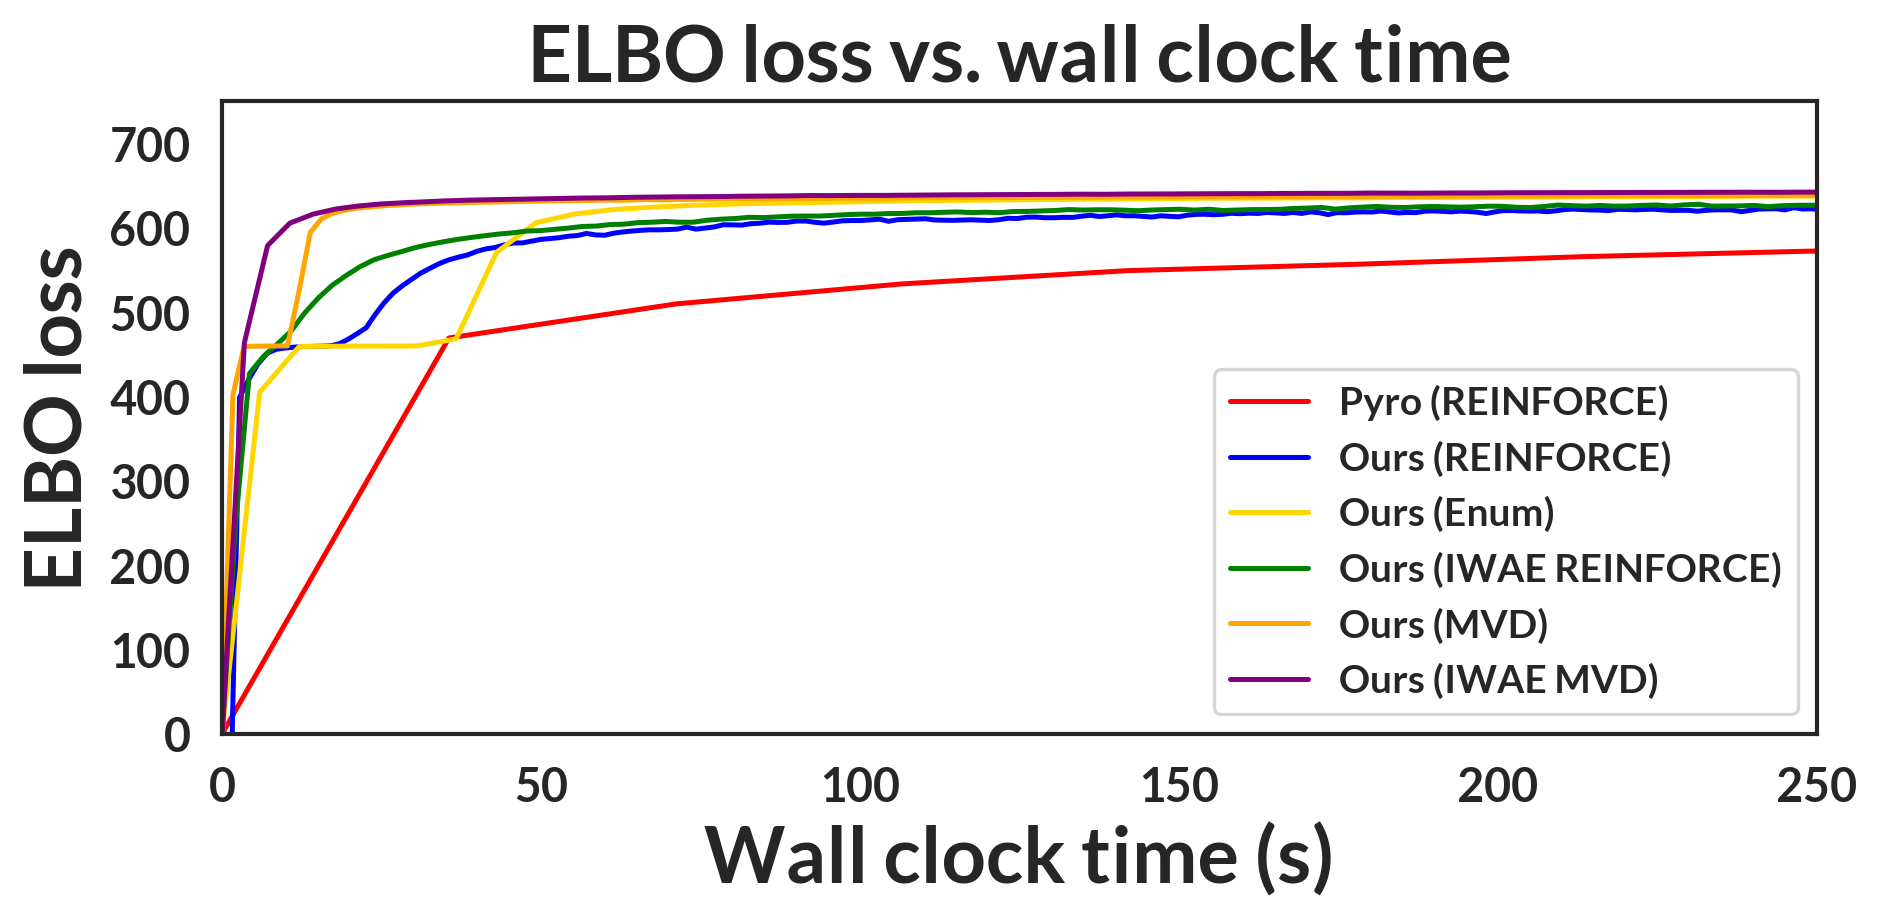

In [11]:
plt.rcParams["text.usetex"] = False
fig, ax = plt.subplots(figsize=(8, 4), dpi=240)
ax.set_ylim(0, 750)
ax.set_xlim(0, 250)
ax.plot(
    np.concatenate(
        [np.array([0.0]), np.array(pyro_reinforce_air["Epoch wall clock times"])]
    ),
    np.concatenate([np.array([0.0]), -np.array(pyro_reinforce_air["ELBO Loss"])]),
    label="Pyro (REINFORCE)",
    color="red",
)
ax.plot(
    np.concatenate(
        [np.array([0.0]), np.array(reinforce_air["Epoch wall clock times"])]
    ),
    np.concatenate([np.array([0.0]), np.array(reinforce_air["ELBO Loss"])]),
    label="Ours (REINFORCE)",
    color="blue",
)
ax.plot(
    np.concatenate([np.array([0.0]), np.array(enum_air["Epoch wall clock times"])]),
    np.concatenate([np.array([0.0]), np.array(enum_air["ELBO Loss"])]),
    label="Ours (Enum)",
    color="gold",
)
ax.plot(
    np.concatenate(
        [np.array([0.0]), np.array(reinforce_iwae_air["Epoch wall clock times"])]
    ),
    np.concatenate([np.array([0.0]), np.array(reinforce_iwae_air["ELBO Loss"])]),
    label="Ours (IWAE REINFORCE)",
    color="green",
)

ax.plot(
    np.concatenate([np.array([0.0]), np.array(mvd_air["Epoch wall clock times"])]),
    np.concatenate([np.array([0.0]), np.array(mvd_air["ELBO Loss"])]),
    label="Ours (MVD)",
    color="orange",
)

ax.plot(
    np.concatenate([np.array([0.0]), np.array(mvd_iwae_air["Epoch wall clock times"])]),
    np.concatenate([np.array([0.0]), np.array(mvd_iwae_air["ELBO Loss"])]),
    label="Ours (IWAE MVD)",
    color="purple",
)

plt.title("ELBO loss vs. wall clock time", fontsize=label_fontsize / 3)
plt.xlabel("Wall clock time (s)", fontsize=label_fontsize / 3)
plt.ylabel("ELBO loss", fontsize=label_fontsize / 3)
plt.legend(fontsize=label_fontsize / 4)
plt.xticks(fontsize=label_fontsize / 5)
plt.yticks(fontsize=label_fontsize / 5)
plt.legend(fontsize=label_fontsize / 6)
fig.savefig("img/elbo_vs_wall_clock.pdf", format="pdf")
plt.show()

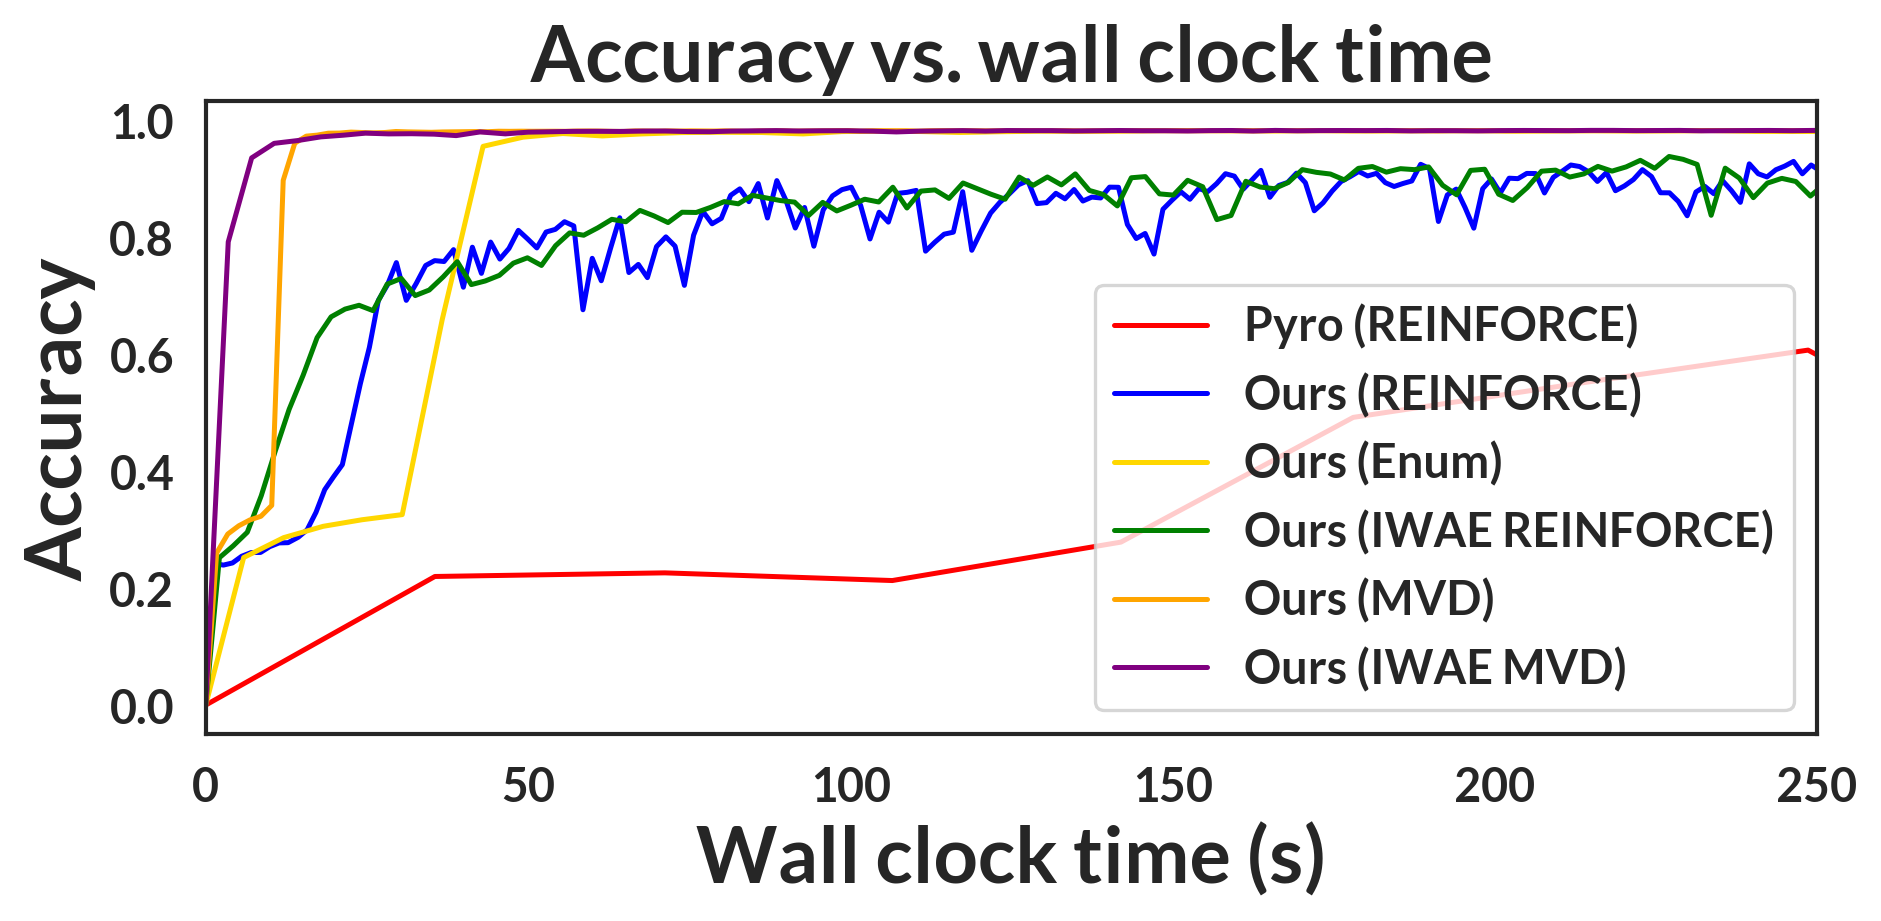

In [12]:
plt.rcParams["text.usetex"] = False
fig, ax = plt.subplots(figsize=(8, 4), dpi=240)
ax.set_xlim(0, 250)
ax.plot(
    np.concatenate(
        [np.array([0.0]), np.array(pyro_reinforce_air["Epoch wall clock times"])]
    ),
    np.concatenate([np.array([0.0]), np.array(pyro_reinforce_air["Accuracy"])]),
    label="Pyro (REINFORCE)",
    color="red",
)
ax.plot(
    np.concatenate(
        [np.array([0.0]), np.array(reinforce_air["Epoch wall clock times"])]
    ),
    np.concatenate([np.array([0.0]), np.array(reinforce_air["Accuracy"])]),
    label="Ours (REINFORCE)",
    color="blue",
)
ax.plot(
    np.concatenate([np.array([0.0]), np.array(enum_air["Epoch wall clock times"])]),
    np.concatenate([np.array([0.0]), np.array(enum_air["Accuracy"])]),
    label="Ours (Enum)",
    color="gold",
)
ax.plot(
    np.concatenate(
        [np.array([0.0]), np.array(reinforce_iwae_air["Epoch wall clock times"])]
    ),
    np.concatenate([np.array([0.0]), np.array(reinforce_iwae_air["Accuracy"])]),
    label="Ours (IWAE REINFORCE)",
    color="green",
)

ax.plot(
    np.concatenate([np.array([0.0]), np.array(mvd_air["Epoch wall clock times"])]),
    np.concatenate([np.array([0.0]), np.array(mvd_air["Accuracy"])]),
    label="Ours (MVD)",
    color="orange",
)

ax.plot(
    np.concatenate([np.array([0.0]), np.array(mvd_iwae_air["Epoch wall clock times"])]),
    np.concatenate([np.array([0.0]), np.array(mvd_iwae_air["Accuracy"])]),
    label="Ours (IWAE MVD)",
    color="purple",
)

plt.title("Accuracy vs. wall clock time", fontsize=label_fontsize / 3)
plt.xlabel("Wall clock time (s)", fontsize=label_fontsize / 3)
plt.ylabel("Accuracy", fontsize=label_fontsize / 3)
plt.legend(fontsize=label_fontsize / 4)
plt.xticks(fontsize=label_fontsize / 5)
plt.yticks(fontsize=label_fontsize / 5)
plt.legend(fontsize=label_fontsize / 5)
fig.savefig("img/accuracy_vs_wall_clock.pdf", format="pdf")
plt.show()

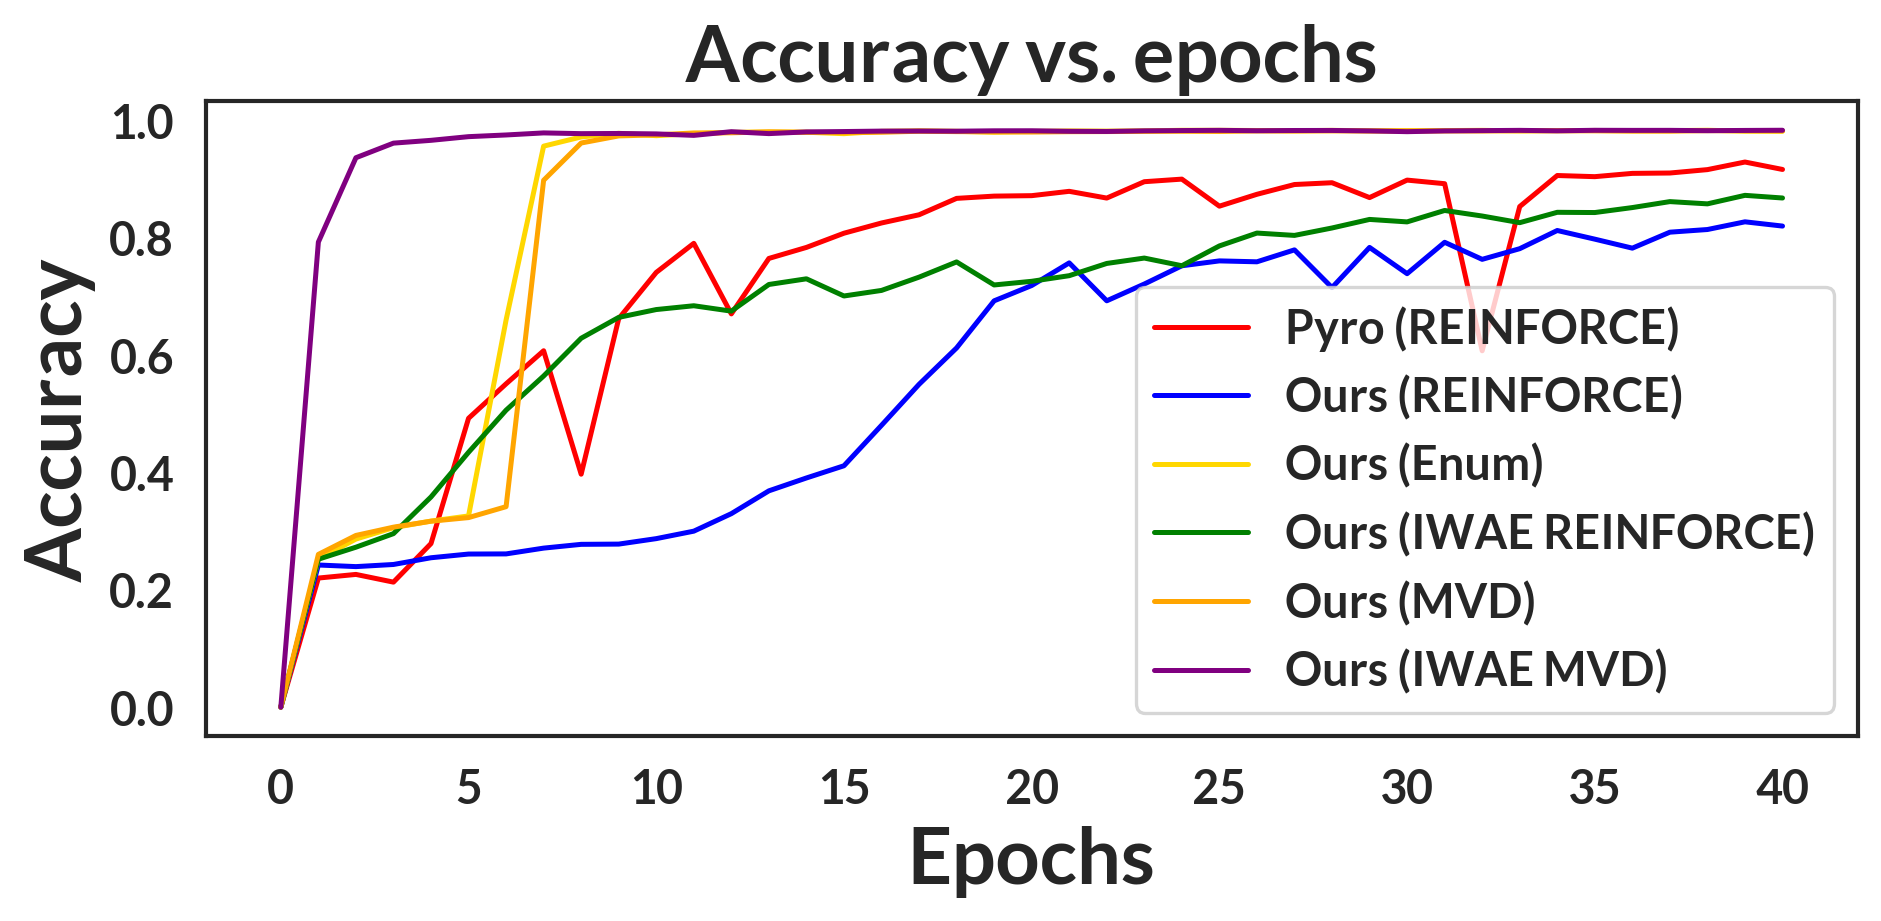

In [13]:
plt.rcParams["text.usetex"] = False
fig, ax = plt.subplots(figsize=(8, 4), dpi=240)
r = np.arange(0, 41)
ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(pyro_reinforce_air["Accuracy"])])[r],
    label="Pyro (REINFORCE)",
    color="red",
)
ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(reinforce_air["Accuracy"])])[r],
    label="Ours (REINFORCE)",
    color="blue",
)
ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(enum_air["Accuracy"])])[r],
    label="Ours (Enum)",
    color="gold",
)
ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(reinforce_iwae_air["Accuracy"])])[r],
    label="Ours (IWAE REINFORCE)",
    color="green",
)

ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(mvd_air["Accuracy"])])[r],
    label="Ours (MVD)",
    color="orange",
)

ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(mvd_iwae_air["Accuracy"])])[r],
    label="Ours (IWAE MVD)",
    color="purple",
)

plt.title("Accuracy vs. epochs", fontsize=label_fontsize / 3)
plt.xlabel("Epochs", fontsize=label_fontsize / 3)
plt.ylabel("Accuracy", fontsize=label_fontsize / 3)
plt.legend(fontsize=label_fontsize / 4)
plt.xticks(fontsize=label_fontsize / 5)
plt.yticks(fontsize=label_fontsize / 5)
plt.legend(fontsize=label_fontsize / 5)
fig.savefig("img/accuracy_vs_epochs.pdf", format="pdf")
plt.show()

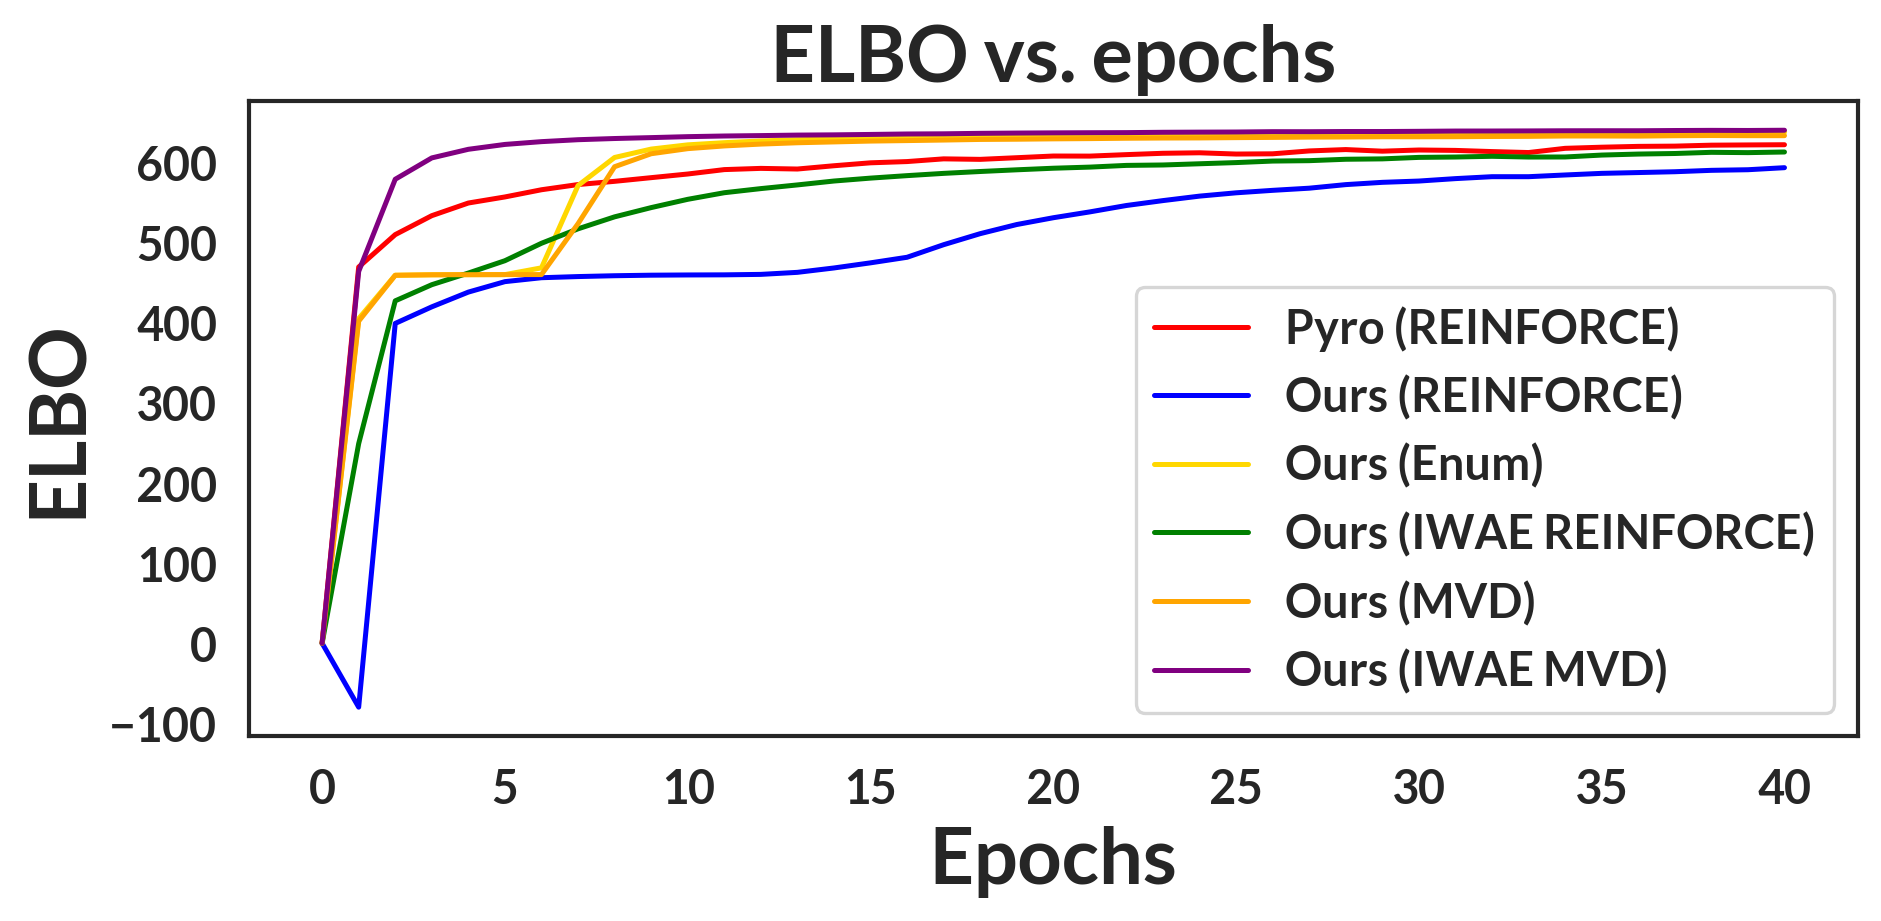

In [14]:
plt.rcParams["text.usetex"] = False
fig, ax = plt.subplots(figsize=(8, 4), dpi=240)
r = np.arange(0, 41)
ax.plot(
    r,
    np.concatenate([np.array([0.0]), -np.array(pyro_reinforce_air["ELBO Loss"])])[r],
    label="Pyro (REINFORCE)",
    color="red",
)
ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(reinforce_air["ELBO Loss"])])[r],
    label="Ours (REINFORCE)",
    color="blue",
)
ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(enum_air["ELBO Loss"])])[r],
    label="Ours (Enum)",
    color="gold",
)
ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(reinforce_iwae_air["ELBO Loss"])])[r],
    label="Ours (IWAE REINFORCE)",
    color="green",
)

ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(mvd_air["ELBO Loss"])])[r],
    label="Ours (MVD)",
    color="orange",
)

ax.plot(
    r,
    np.concatenate([np.array([0.0]), np.array(mvd_iwae_air["ELBO Loss"])])[r],
    label="Ours (IWAE MVD)",
    color="purple",
)

plt.title("ELBO vs. epochs", fontsize=label_fontsize / 3)
plt.xlabel("Epochs", fontsize=label_fontsize / 3)
plt.ylabel("ELBO", fontsize=label_fontsize / 3)
plt.legend(fontsize=label_fontsize / 4)
plt.xticks(fontsize=label_fontsize / 5)
plt.yticks(fontsize=label_fontsize / 5)
plt.legend(fontsize=label_fontsize / 5)
fig.savefig("img/elbo_vs_epochs.pdf", format="pdf")
plt.show()